In [1]:
! pip install -q kaggle
from google.colab import files
files.upload()
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [ ]:
!kaggle datasets download -d kritikseth/us-airbnb-open-data

401 - Unauthorized


In [ ]:
!unzip /content/us-airbnb-open-data.zip

unzip:  cannot find or open /content/us-airbnb-open-data.zip, /content/us-airbnb-open-data.zip.zip or /content/us-airbnb-open-data.zip.ZIP.


In [31]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.metrics import mean_squared_error as mse

In [4]:
df=pd.read_csv('AB_US_2020.csv')
df

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,city
0,38585,Charming Victorian home - twin beds + breakfast,165529,Evelyne,NaN,28804,35.651460,-82.627920,Private room,60,1,138,16/02/20,1.14,1,0,Asheville
1,80905,French Chic Loft,427027,Celeste,NaN,28801,35.597790,-82.555400,Entire home/apt,470,1,114,07/09/20,1.03,11,288,Asheville
2,108061,Walk to stores/parks/downtown. Fenced yard/Pet...,320564,Lisa,NaN,28801,35.606700,-82.555630,Entire home/apt,75,30,89,30/11/19,0.81,2,298,Asheville
3,155305,Cottage! BonPaul + Sharky's Hostel,746673,BonPaul,NaN,28806,35.578640,-82.595780,Entire home/apt,90,1,267,22/09/20,2.39,5,0,Asheville
4,160594,Historic Grove Park,769252,Elizabeth,NaN,28801,35.614420,-82.541270,Private room,125,30,58,19/10/15,0.52,1,0,Asheville
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226025,45506143,"DC Hidden In Plain ""Site""",25973146,Marci,NaN,"Downtown, Chinatown, Penn Quarters, Mount Vern...",38.903880,-77.029730,Entire home/apt,104,1,0,NaN,NaN,2,99,Washington D.C.
226026,45511428,DC 3 BR w/ screen porch 3 blck to metro w/ par...,231133074,Thomas,NaN,"Brookland, Brentwood, Langdon",38.920820,-76.990980,Entire home/apt,151,2,0,NaN,NaN,1,300,Washington D.C.
226027,45514685,Charming Penthouse Apt w/ Rooftop Terrace in L...,33758935,Bassem,NaN,"Shaw, Logan Circle",38.911170,-77.033540,Entire home/apt,240,2,0,NaN,NaN,1,173,Washington D.C.
226028,45516412,Adams Morgan/Nat'l Zoo 1 BR Apt #32,23193071,Michael,NaN,"Kalorama Heights, Adams Morgan, Lanier Heights",38.926630,-77.044360,Entire home/apt,60,21,0,NaN,NaN,5,362,Washington D.C.


In [5]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'city'],
      dtype='object')

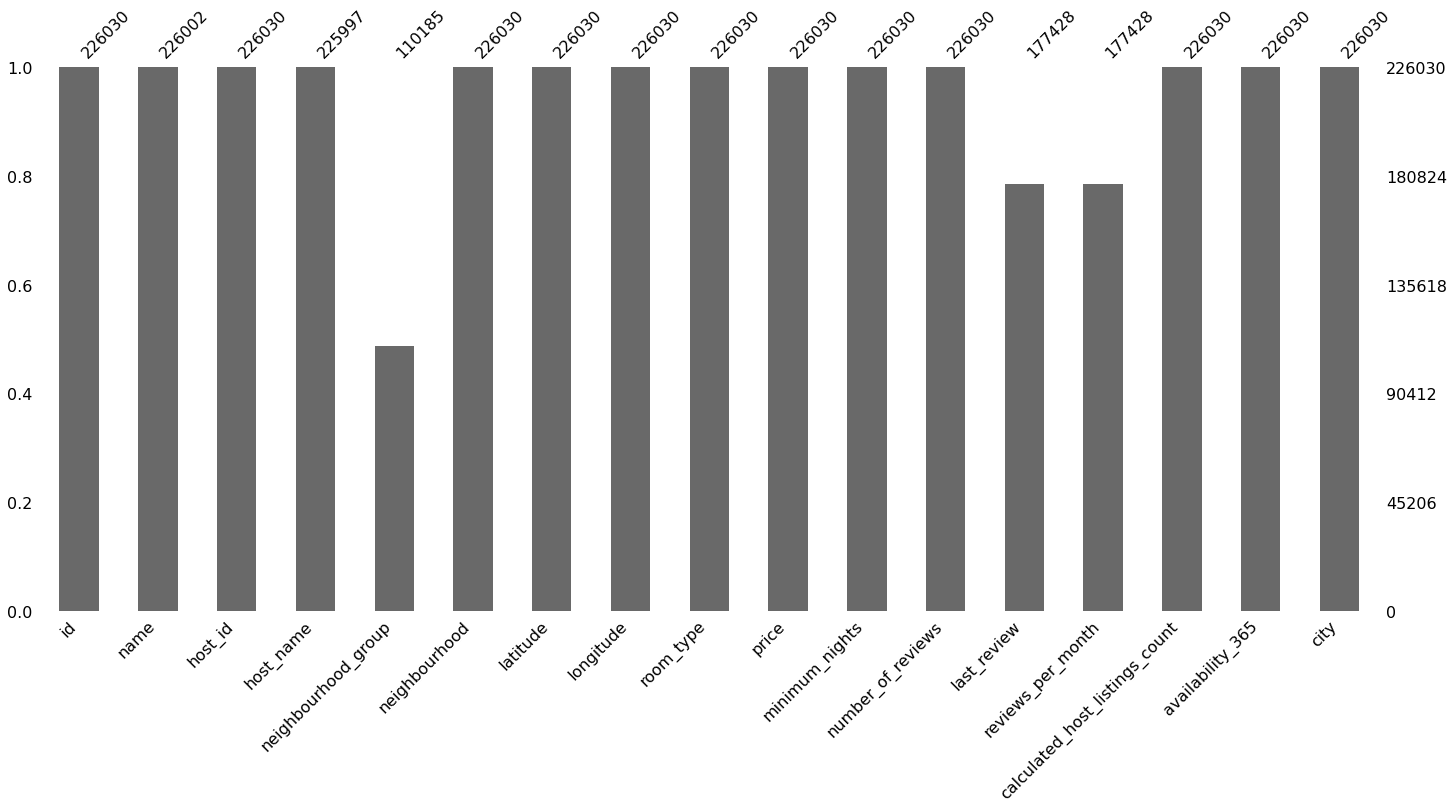

In [6]:
msno.bar(df)

In [7]:
df.drop(columns=['name','id','host_id','host_name','neighbourhood_group','latitude','longitude','neighbourhood'],inplace=True)
df

,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,city
0,Private room,60,1,138,16/02/20,1.14,1,0,Asheville
1,Entire home/apt,470,1,114,07/09/20,1.03,11,288,Asheville
2,Entire home/apt,75,30,89,30/11/19,0.81,2,298,Asheville
3,Entire home/apt,90,1,267,22/09/20,2.39,5,0,Asheville
4,Private room,125,30,58,19/10/15,0.52,1,0,Asheville
...,...,...,...,...,...,...,...,...,...
226025,Entire home/apt,104,1,0,NaN,NaN,2,99,Washington D.C.
226026,Entire home/apt,151,2,0,NaN,NaN,1,300,Washington D.C.
226027,Entire home/apt,240,2,0,NaN,NaN,1,173,Washington D.C.
226028,Entire home/apt,60,21,0,NaN,NaN,5,362,Washington D.C.


In [8]:
df.drop(columns=['last_review'],inplace=True)
df

,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,city
0,Private room,60,1,138,1.14,1,0,Asheville
1,Entire home/apt,470,1,114,1.03,11,288,Asheville
2,Entire home/apt,75,30,89,0.81,2,298,Asheville
3,Entire home/apt,90,1,267,2.39,5,0,Asheville
4,Private room,125,30,58,0.52,1,0,Asheville
...,...,...,...,...,...,...,...,...
226025,Entire home/apt,104,1,0,NaN,2,99,Washington D.C.
226026,Entire home/apt,151,2,0,NaN,1,300,Washington D.C.
226027,Entire home/apt,240,2,0,NaN,1,173,Washington D.C.
226028,Entire home/apt,60,21,0,NaN,5,362,Washington D.C.


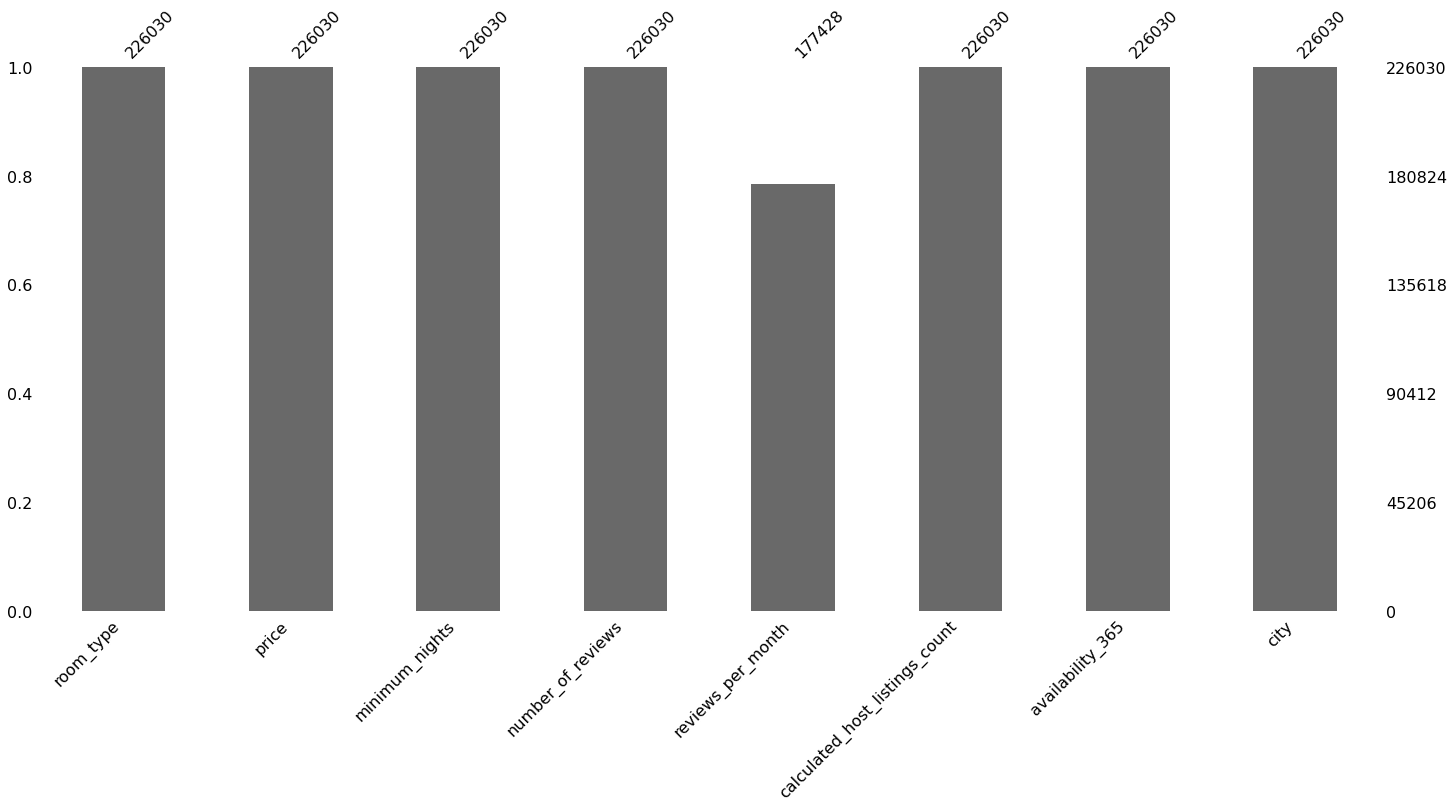

In [9]:
msno.bar(df)

In [10]:
df.reviews_per_month.value_counts()

0.03     2836
0.02     2758
0.08     2525
0.04     2482
0.06     2407
         ... 
10.49       1
9.74        1
12.78       1
12.11       1
10.24       1
Name: reviews_per_month, Length: 1242, dtype: int64

In [11]:
df.reviews_per_month

0         1.14
1         1.03
2         0.81
3         2.39
4         0.52
          ... 
226025     NaN
226026     NaN
226027     NaN
226028     NaN
226029     NaN
Name: reviews_per_month, Length: 226030, dtype: float64

In [12]:
df['reviews_per_month']=df['reviews_per_month'].fillna(np.mean(df['reviews_per_month']))
df.reviews_per_month

0         1.14000
1         1.03000
2         0.81000
3         2.39000
4         0.52000
           ...   
226025    1.43145
226026    1.43145
226027    1.43145
226028    1.43145
226029    1.43145
Name: reviews_per_month, Length: 226030, dtype: float64

In [13]:
lb=LabelEncoder()
df.room_type=lb.fit_transform(df.room_type)
df.city=lb.fit_transform(df.city)
df

,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,city
0,2,60,1,138,1.14000,1,0,0
1,0,470,1,114,1.03000,11,288,0
2,0,75,30,89,0.81000,2,298,0
3,0,90,1,267,2.39000,5,0,0
4,2,125,30,58,0.52000,1,0,0
...,...,...,...,...,...,...,...,...
226025,0,104,1,0,1.43145,2,99,27
226026,0,151,2,0,1.43145,1,300,27
226027,0,240,2,0,1.43145,1,173,27
226028,0,60,21,0,1.43145,5,362,27


In [14]:
from sklearn.model_selection import train_test_split
X=df.drop(columns=['price'])
Y=df['price']
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=23)

In [15]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
xtrain = sc_X.fit_transform(xtrain)
xtest = sc_X.transform(xtest)


In [16]:
#from sklearn.metrics import accuracy_score
#from sklearn.tree import DecisionTreeRegressor


#regressor = DecisionTreeRegressor(random_state = 0) 
#regressor = reg.fit(xtrain,ytrain)
#regressor.fit(xtrain, ytrain)
#y = regressor.predict(xtest)
#print(y)

In [17]:
from sklearn.neighbors import KNeighborsRegressor
from time import time
start=time()
print(start)
knn=KNeighborsRegressor()
print('Baseline Model ')
knn.fit(xtrain,ytrain)
prediction=knn.predict(xtest)
train_pred=knn.predict(xtrain)
knn.score(xtest,ytest)
end=time()
print('time taken to run ',end-start)

1622294300.0399897
Baseline Model 
time taken to run  44.81720423698425


In [18]:
from sklearn.metrics import mean_squared_error as mse
mse(ytest,prediction)

263346.6601610406

In [19]:
from sklearn.linear_model import LinearRegression
ols=LinearRegression()
ols.fit(xtrain,ytrain)
prediction=ols.predict(xtest)

In [20]:
from sklearn.metrics import mean_squared_error as mse
print('OLS ',mse(ytest,prediction))
print('OLS ',np.sqrt(mse(ytest,prediction)))

OLS  288218.08853011363
OLS  536.8594681386495


In [21]:
from sklearn.linear_model import SGDRegressor
lr=SGDRegressor()
lr.fit(xtrain,ytrain)
xpred=lr.predict(xtrain)
prediction2=lr.predict(xtest)

In [22]:
print('Linear Regresion test',mse(ytest,prediction2))
print('Linear Regresion train',mse(ytrain,xpred))
print('Linear Regression ',np.sqrt(mse(ytest,prediction2)))

Linear Regresion test 43487177905435.4
Linear Regresion train 3.3698502628727823e+21
Linear Regression  6594480.867015644


In [23]:
lr.intercept_

array([-1.36650035e+08])

In [25]:
xtrain.shape


(180824, 7)

In [26]:
# xtrain2=xtrain.reshape((-1,1))

In [ ]:
ytest2=ytest

In [45]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor() 
regressor.fit(xtrain, ytrain)
y_pred = regressor.predict(xtest)
print(mse(ytest,y_pred))



324162.7980516089


In [36]:
from sklearn.ensemble import RandomForestRegressor
rfregressor=RandomForestRegressor(n_jobs=-1,random_state=23)
rfregressor.fit(xtrain, ytrain)
y_pred = rfregressor.predict(xtest)


199339.5928050704


In [37]:
print(np.sqrt(mse(ytest,y_pred)))

446.4746272802861
